In [1]:
!pip install -q transformers==4.37.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 18.0 MB/s eta 0:00:00


In [2]:
!pip install pydot

In [3]:
from transformers import BertTokenizer, TFBertModel

In [4]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [5]:
from collections import Counter
import numpy as np
import tensorflow as tf
from tensorflow import keras

import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint

In [6]:
import json
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf
# Load JSONL dataset
data = []
train_texts=[]
train_labels=[]
train_targets=[]
# get train example and label
with open('train.json', 'r') as f:
    for line in f:
      text=json.loads(line)
      data.append(text)
      train_texts.append(text['sentence_normalized'])
      polarity=int(text['targets'][0]['polarity'])
      this_polarity = -1
      if polarity==2:
        this_polarity = 0
      elif polarity==4:
        this_polarity = 1
      elif polarity==6:
        this_polarity = 2
      else:
        print('error')

      train_labels.append(this_polarity)
      targets = text['targets']
      target_vector = np.zeros(150)

      for target in targets:
        target_vector[target['from']:target['to']] = this_polarity

      train_targets.append(target_vector)












# Preprocess Data and Tokenization



#print(data[0])


In [7]:
print(train_texts[2])

Für La Stampa ist es seit dem Treffen von Monti, Merkel, Hollande und Rajoy in Rom am 22. Juni klar, dass der am Donnerstag beginnende Gipfel „die erste schwere Prüfung sein wird, mit der die europäischen Staats- und Regierungschefs versuchen werden, eine neue Währungsunion zu gründen und, wer weiß, zu starten“:



In [8]:

# Load JSONL dataset
data_test = []
test_texts=[]
test_labels=[]
test_targets=[]
# get test example and label
with open('test.jsonl', 'r') as f:
    for line in f:
      text=json.loads(line)
      data_test.append(text)
      test_texts.append(text['sentence_normalized'])
      polarity=int(text['targets'][0]['polarity'])
      this_polarity = -1
      if polarity==2:
        this_polarity = 0
      elif polarity==4:
        this_polarity = 1
      elif polarity==6:
        this_polarity = 2
      else:
        print('error')

      test_labels.append(this_polarity)
      targets = text['targets']
      target_vector = np.zeros(150)

      for target in targets:
        target_vector[target['from']:target['to']] = this_polarity

      test_targets.append(target_vector)


In [9]:
print(len(test_texts))

1000


In [10]:
# Load JSONL dataset
data_vali = []
valid_texts=[]
valid_labels=[]
valid_targets=[]
# get valid example and label
with open('validation.jsonl', 'r') as f:
    for line in f:
      text=json.loads(line)
      data_vali.append(text)
      valid_texts.append(text['sentence_normalized'])
      polarity=int(text['targets'][0]['polarity'])
      this_polarity = -1
      if polarity==2:
        this_polarity = 0
      elif polarity==4:
        this_polarity = 1
      elif polarity==6:
        this_polarity = 2
      else:
        print('error')

      valid_labels.append(this_polarity)
      targets = text['targets']
      target_vector = np.zeros(150)

      for target in targets:
        target_vector[target['from']:target['to']] = this_polarity

      valid_targets.append(target_vector)

In [11]:
print(len(valid_texts))

300


In [12]:
integer_counts = Counter(valid_labels)
# Print the summary
for integer, count in integer_counts.items():
    print(f"Integer {integer} appears {count} times")

Integer 2 appears 71 times
Integer 1 appears 117 times
Integer 0 appears 112 times


In [13]:
integer_counts = Counter(test_labels)
# Print the summary
for integer, count in integer_counts.items():
    print(f"Integer {integer} appears {count} times")

Integer 1 appears 401 times
Integer 0 appears 364 times
Integer 2 appears 235 times


In [14]:
integer_counts = Counter(train_labels)
# Print the summary
for integer, count in integer_counts.items():
    print(f"Integer {integer} appears {count} times")

Integer 1 appears 1493 times
Integer 0 appears 1363 times
Integer 2 appears 954 times


In [15]:
#baseline multinomial Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

In [16]:
# Training data

# Create a pipeline with CountVectorizer and MultinomialNB
pipeline = Pipeline([
    ('vect', CountVectorizer()),  # Convert text to word count vectors
    ('clf', MultinomialNB()),     # Multinomial Naive Bayes classifier
])
# Train the model
pipeline.fit(train_texts, train_labels)
# Test the model
# Example test data

# Predict sentiment for test data
predictions = pipeline.predict(test_texts)
print(predictions)

[1 0 0 1 1 0 1 1 0 0 0 1 0 1 1 1 0 0 1 1 1 0 1 0 0 2 1 1 1 0 0 0 0 0 2 1 1
 1 1 1 0 1 1 1 2 0 1 1 0 2 1 1 1 0 2 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0 0 2 0 1
 0 0 2 2 0 1 1 0 2 1 1 0 2 1 2 1 1 1 1 0 1 1 1 1 1 2 0 0 1 0 1 0 0 0 0 0 1
 1 1 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 2 0 0 2 0 1 1 0 1 2 0 1 0 0 1
 0 1 1 0 0 1 0 0 1 0 1 0 1 1 1 1 0 2 1 0 0 1 0 1 0 0 2 2 1 0 0 0 2 1 1 0 1
 1 1 1 1 1 1 2 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 2 1 0 0 2 1 1 1 0 0 1 0 0 0 0
 1 0 1 0 0 1 0 0 1 0 0 1 0 1 2 2 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1
 0 0 1 2 0 0 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 2 1 1 1 0 0 1 1 0 1 0 1 0 2 0
 0 0 1 0 1 1 0 1 0 2 1 0 0 0 1 1 0 0 2 0 1 0 0 0 0 0 0 1 0 1 1 0 1 0 1 0 0
 1 0 1 0 0 0 0 1 2 0 1 1 1 0 2 0 0 1 0 0 0 2 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0
 2 0 0 1 0 1 0 0 0 0 1 0 0 2 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 2 1
 1 0 1 0 0 1 0 0 1 0 0 0 0 1 2 1 0 0 1 1 2 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 0 1 1 0 1 0 2 1 0 1 1 0 1 0 0 0 1 0 1 0 1 2 0 0 0 1 0 1 2 1 0 1 1 0 0
 0 1 0 0 1 1 1 1 0 1 0 1 

In [17]:
# Evaluate model performance
accuracy = accuracy_score(test_labels, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.538


In [18]:
model_checkpoint = 'bert-base-multilingual-cased'

In [19]:
bert_tokenizer = BertTokenizer.from_pretrained(model_checkpoint)
bert_model = TFBertModel.from_pretrained(model_checkpoint)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [20]:
max_length = 150

In [21]:
# tokenize the dataset, truncate at `max_length`,
# and pad with 0's when less than `max_length` and return a tf Tensor
train_encodings = bert_tokenizer(train_texts, truncation=True, padding='max_length', max_length=max_length, return_tensors='tf')
valid_encodings = bert_tokenizer(valid_texts, truncation=True, padding='max_length', max_length=max_length, return_tensors='tf')
test_encodings = bert_tokenizer(test_texts, truncation=True, padding='max_length', max_length=max_length, return_tensors='tf')

In [22]:
train_encodings.input_ids[:1]

<tf.Tensor: shape=(1, 150), dtype=int32, numpy=
array([[   101,  51105,  13502,  24114,  46594,  10915,  87394,  10211,
         46708,  37113,  11569,  10128,    187,  10269, 107358,  52033,
         10245,  29330,  57747,  67487,  13396,  59042,  63594,  13796,
         32066,  10161,  11058,  10128,    144, 105687,  74456,  18508,
           117,  10211,  20327,  13502,  19004,  45131,  12817,  10304,
         85647,    119,    102,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0, 

In [23]:
from tensorflow.keras.layers import Input, Dense, Dropout, Concatenate, Reshape, GlobalMaxPooling1D, MultiHeadAttention
from tensorflow.keras.models import Model
from transformers import TFBertModel

def create_target_dependent_sentiment_model(checkpoint=model_checkpoint,
                                            num_classes=3,
                                            hidden_size=201,
                                            dropout=0.3,
                                            learning_rate=0.00005):
    """
    Build a multi-input sentiment analysis model with BERT, target embeddings, and attention mechanism.
    """
    # Load pre-trained BERT model
    bert_model = TFBertModel.from_pretrained(checkpoint)

    # Freeze BERT layers to prevent training
    for layer in bert_model.layers:
        layer.trainable = False

    # Define input layers for BERT
    input_ids = Input(shape=(max_length,), dtype='int32', name='input_ids')
    token_type_ids = Input(shape=(max_length,), dtype='int32', name='token_type_ids')
    attention_mask = Input(shape=(max_length,), dtype='int32', name='attention_mask')

    # Get BERT output
    bert_output = bert_model(input_ids, token_type_ids=token_type_ids, attention_mask=attention_mask)[0]  # BERT sequence output

    # Reshape BERT output to add sequence length dimension
    bert_output_reshaped = Reshape((-1, 768))(bert_output)

    # Apply attention mechanism to BERT output
    attention_output = MultiHeadAttention(num_heads=2, key_dim=64)(bert_output_reshaped, bert_output_reshaped)

    # Apply global max pooling to extract relevant features from attention output
    pooled_output = GlobalMaxPooling1D()(attention_output)

    # Define input layer for target IDs
    target_ids = Input(shape=(max_length,), dtype='float32', name='target_ids')

    # Add a dense layer to process target IDs
    target_layer = Dense(hidden_size, activation='relu')(target_ids)

    # Concatenate pooled attention output with processed target IDs
    concatenated_output = Concatenate()([pooled_output, target_layer])

    # Add hidden layer with dropout
    hidden_layer = Dense(hidden_size, activation='relu', name='hidden_layer')(concatenated_output)
    dropout_layer = Dropout(dropout)(hidden_layer)

    # Add classification layer
    output = Dense(num_classes, activation='softmax', name='output')(dropout_layer)  # Softmax for multi-class classification

    # Create model
    classification_model = Model(inputs=[input_ids, token_type_ids, attention_mask, target_ids], outputs=output)

    # Compile model
    classification_model.compile(optimizer='adam',
                                  loss='sparse_categorical_crossentropy',
                                  metrics=['accuracy'])

    return classification_model

In [24]:
pooler_bert_model = create_target_dependent_sentiment_model(num_classes=3)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [25]:
pooler_bert_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 150)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 150)]                0         []                            
 )                                                                                                
                                                                                                  
 token_type_ids (InputLayer  [(None, 150)]                0         []                            
 )                                                                                                
                                                                                              

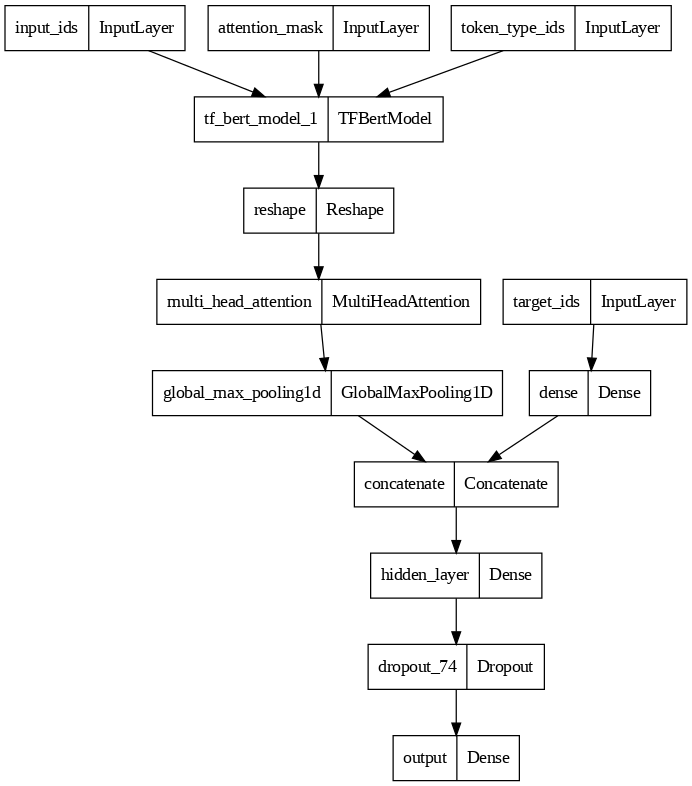

In [26]:
keras.utils.plot_model(pooler_bert_model, show_shapes=False, show_dtype=False, show_layer_names=True, dpi=90)

In [27]:
#get the labels in a needed data format for validation
npvalid_labels = np.asarray(valid_labels)

In [28]:
import numpy as np  # Ensure numpy is imported

# Convert train_labels and valid_labels to numpy arrays if they are not already
train_labels = np.array(train_labels)
valid_labels = np.array(valid_labels)

# Use a dictionary to pass input data to the fit method
input_data_train = {
    'input_ids': train_encodings.input_ids,
    'token_type_ids': train_encodings.token_type_ids,
    'attention_mask': train_encodings.attention_mask,
    'target_ids': np.array(train_targets)
}

input_data_valid = {
    'input_ids': valid_encodings.input_ids,
    'token_type_ids': valid_encodings.token_type_ids,
    'attention_mask': valid_encodings.attention_mask,
    'target_ids': np.array(valid_targets)
}

# Fit the model using the dictionary format for input data
pooler_bert_model_history = pooler_bert_model.fit(
    x=input_data_train,
    y=train_labels,
    validation_data=(input_data_valid, valid_labels),
    batch_size=8,
    epochs=1
)

477/477 [==============================] - 2283s 5s/step - loss: 0.4504 - accuracy: 0.8304 - val_loss: 0.3098 - val_accuracy: 0.9167


In [29]:
print(train_labels[:100])

[1 1 1 0 1 0 1 2 1 0 1 1 2 1 1 1 2 1 0 0 1 1 1 0 1 2 2 0 1 0 2 2 2 0 0 1 0
 0 1 0 0 1 2 0 1 2 0 1 1 1 2 2 2 1 0 0 1 2 2 1 1 1 2 1 0 0 0 0 2 0 1 1 1 0
 1 1 2 0 0 1 1 0 1 0 1 0 2 0 0 1 0 1 1 0 1 0 0 0 1 0]


In [30]:
# Convert test_labels to a numpy array if it is not already
test_labels = np.array(test_labels)

# Use a dictionary to pass input data to the evaluate method
input_data_test = {
    'input_ids': test_encodings.input_ids,
    'token_type_ids': test_encodings.token_type_ids,
    'attention_mask': test_encodings.attention_mask,
    'target_ids': np.array(test_targets)
}

# Evaluate the model using the dictionary format for input data
score = pooler_bert_model.evaluate(
    x=input_data_test,
    y=test_labels
)

print('Test loss:', score[0])
print('Test accuracy:', score[1])


32/32 [==============================] - 519s 16s/step - loss: 0.2552 - accuracy: 0.9390
Test loss: 0.25523003935813904
Test accuracy: 0.9390000104904175


In [ ]:
predictions = pooler_bert_model.predict(
    [test_encodings.input_ids, test_encodings.token_type_ids, test_encodings.attention_mask, np.array(test_targets)]
)
predictions_model1 = tf.argmax(predictions, axis=-1)
predictions_model1

In [ ]:
target_names=['negative','neutral','positive']

In [33]:
print(classification_report(test_labels, predictions_model1.numpy(), target_names=target_names))

              precision    recall  f1-score   support

    negative       0.89      0.99      0.94       364
     neutral       0.97      0.90      0.93       401
    positive       0.98      0.91      0.95       235

    accuracy                           0.94      1000
   macro avg       0.95      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000

              precision    recall  f1-score   support

    negative       0.89      0.99      0.94       364
     neutral       0.97      0.90      0.93       401
    positive       0.98      0.91      0.95       235

    accuracy                           0.94      1000
   macro avg       0.95      0.94      0.94      1000
weighted avg       0.94      0.94      0.94      1000

